In [29]:
from load_data import MyOwnDataset
import torch
import torch.nn as nn
from torch.nn import Linear, ConvTranspose2d, MSELoss, CrossEntropyLoss
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, GAE
from torch_geometric.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import image
import cv2

print("Loading data....")
dataset = MyOwnDataset(root = "data/POLY/")
train_dataset = dataset[:4500]
test_dataset = dataset[4500:5000]
image_train_dataset = []
image_test_dataset = []
for i in range (4500):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/4500" %i)
    image_train_dataset.append(image)
for i in range (4500,5000):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/500" %(i-4500))
    image_test_dataset.append(image)

Loading data....
0/4500
1/4500
2/4500
3/4500
4/4500
5/4500
6/4500
7/4500
8/4500
9/4500
10/4500
11/4500
12/4500
13/4500
14/4500
15/4500
16/4500
17/4500
18/4500
19/4500
20/4500
21/4500
22/4500
23/4500
24/4500
25/4500
26/4500
27/4500
28/4500
29/4500
30/4500
31/4500
32/4500
33/4500
34/4500
35/4500
36/4500
37/4500
38/4500
39/4500
40/4500
41/4500
42/4500
43/4500
44/4500
45/4500
46/4500
47/4500
48/4500
49/4500
50/4500
51/4500
52/4500
53/4500
54/4500
55/4500
56/4500
57/4500
58/4500
59/4500
60/4500
61/4500
62/4500
63/4500
64/4500
65/4500
66/4500
67/4500
68/4500
69/4500
70/4500
71/4500
72/4500
73/4500
74/4500
75/4500
76/4500
77/4500
78/4500
79/4500
80/4500
81/4500
82/4500
83/4500
84/4500
85/4500
86/4500
87/4500
88/4500
89/4500
90/4500
91/4500
92/4500
93/4500
94/4500
95/4500
96/4500
97/4500
98/4500
99/4500
100/4500
101/4500
102/4500
103/4500
104/4500
105/4500
106/4500
107/4500
108/4500
109/4500
110/4500
111/4500
112/4500
113/4500
114/4500
115/4500
116/4500
117/4500
118/4500
119/4500
120/4500
121/

1060/4500
1061/4500
1062/4500
1063/4500
1064/4500
1065/4500
1066/4500
1067/4500
1068/4500
1069/4500
1070/4500
1071/4500
1072/4500
1073/4500
1074/4500
1075/4500
1076/4500
1077/4500
1078/4500
1079/4500
1080/4500
1081/4500
1082/4500
1083/4500
1084/4500
1085/4500
1086/4500
1087/4500
1088/4500
1089/4500
1090/4500
1091/4500
1092/4500
1093/4500
1094/4500
1095/4500
1096/4500
1097/4500
1098/4500
1099/4500
1100/4500
1101/4500
1102/4500
1103/4500
1104/4500
1105/4500
1106/4500
1107/4500
1108/4500
1109/4500
1110/4500
1111/4500
1112/4500
1113/4500
1114/4500
1115/4500
1116/4500
1117/4500
1118/4500
1119/4500
1120/4500
1121/4500
1122/4500
1123/4500
1124/4500
1125/4500
1126/4500
1127/4500
1128/4500
1129/4500
1130/4500
1131/4500
1132/4500
1133/4500
1134/4500
1135/4500
1136/4500
1137/4500
1138/4500
1139/4500
1140/4500
1141/4500
1142/4500
1143/4500
1144/4500
1145/4500
1146/4500
1147/4500
1148/4500
1149/4500
1150/4500
1151/4500
1152/4500
1153/4500
1154/4500
1155/4500
1156/4500
1157/4500
1158/4500
1159/4500


2266/4500
2267/4500
2268/4500
2269/4500
2270/4500
2271/4500
2272/4500
2273/4500
2274/4500
2275/4500
2276/4500
2277/4500
2278/4500
2279/4500
2280/4500
2281/4500
2282/4500
2283/4500
2284/4500
2285/4500
2286/4500
2287/4500
2288/4500
2289/4500
2290/4500
2291/4500
2292/4500
2293/4500
2294/4500
2295/4500
2296/4500
2297/4500
2298/4500
2299/4500
2300/4500
2301/4500
2302/4500
2303/4500
2304/4500
2305/4500
2306/4500
2307/4500
2308/4500
2309/4500
2310/4500
2311/4500
2312/4500
2313/4500
2314/4500
2315/4500
2316/4500
2317/4500
2318/4500
2319/4500
2320/4500
2321/4500
2322/4500
2323/4500
2324/4500
2325/4500
2326/4500
2327/4500
2328/4500
2329/4500
2330/4500
2331/4500
2332/4500
2333/4500
2334/4500
2335/4500
2336/4500
2337/4500
2338/4500
2339/4500
2340/4500
2341/4500
2342/4500
2343/4500
2344/4500
2345/4500
2346/4500
2347/4500
2348/4500
2349/4500
2350/4500
2351/4500
2352/4500
2353/4500
2354/4500
2355/4500
2356/4500
2357/4500
2358/4500
2359/4500
2360/4500
2361/4500
2362/4500
2363/4500
2364/4500
2365/4500


3442/4500
3443/4500
3444/4500
3445/4500
3446/4500
3447/4500
3448/4500
3449/4500
3450/4500
3451/4500
3452/4500
3453/4500
3454/4500
3455/4500
3456/4500
3457/4500
3458/4500
3459/4500
3460/4500
3461/4500
3462/4500
3463/4500
3464/4500
3465/4500
3466/4500
3467/4500
3468/4500
3469/4500
3470/4500
3471/4500
3472/4500
3473/4500
3474/4500
3475/4500
3476/4500
3477/4500
3478/4500
3479/4500
3480/4500
3481/4500
3482/4500
3483/4500
3484/4500
3485/4500
3486/4500
3487/4500
3488/4500
3489/4500
3490/4500
3491/4500
3492/4500
3493/4500
3494/4500
3495/4500
3496/4500
3497/4500
3498/4500
3499/4500
3500/4500
3501/4500
3502/4500
3503/4500
3504/4500
3505/4500
3506/4500
3507/4500
3508/4500
3509/4500
3510/4500
3511/4500
3512/4500
3513/4500
3514/4500
3515/4500
3516/4500
3517/4500
3518/4500
3519/4500
3520/4500
3521/4500
3522/4500
3523/4500
3524/4500
3525/4500
3526/4500
3527/4500
3528/4500
3529/4500
3530/4500
3531/4500
3532/4500
3533/4500
3534/4500
3535/4500
3536/4500
3537/4500
3538/4500
3539/4500
3540/4500
3541/4500


64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/500
139/500
140/500
141/500
142/500
143/500
144/500
145/500
146/500
147/500
148/500
149/500
150/500
151/500
152/500
153/500
154/500
155/500
156/500
157/500
158/500
159/500
160/500
161/500
162/500
163/500
164/500
165/500
166/500
167/500
168/500
169/500
170/500
171/500
172/500
173/500
174/500
175/500
176/500
177/500
178/500
179/500
180/500
181/500
182/500
183/500
184/500
185/500
186/500
187/500
188/500
189/500
190/500
191/500
192/500
193/

In [30]:
print("Training dataset length: ", len(train_dataset), "\nTesting dataset length: ", len(test_dataset))
print("Training images loaded:", len(image_train_dataset), "\nTesting images loaded:", len(image_test_dataset))
print()

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
train_images_loader = torch.utils.data.DataLoader(
    image_train_dataset, batch_size = 64
    )
test_images_loader = torch.utils.data.DataLoader(
    image_test_dataset, batch_size = 64
    )
print(f'Number of training batches created: {len(train_loader)}')

Training dataset length:  4500 
Testing dataset length:  500
Training images loaded: 4500 
Testing images loaded: 500

Number of training batches created: 71


In [31]:
class UnFlatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), 40, 6, 6)

class Encoder(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(Encoder, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 32)
        self.conv3 = GCNConv(32, 64)
        self.lin1 = Linear(64, 128)
      
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin1(x)
        x = F.relu(x)
    
        return x


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.up = nn.Sequential(
            nn.Linear(128, 256, bias = True),
            nn.ReLU(True),
            nn.Linear(256, 512, bias = True),
            nn.ReLU(True),
            nn.Linear(512, 1440, bias = True),
            nn.ReLU(True),
            UnFlatten(),
            nn.ConvTranspose2d(40,40,kernel_size=(4,4),stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(40,20,kernel_size = (5,5), stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(20,1,kernel_size = (4,4), stride = (2,2), bias = True)
            )
    def forward(self, output):
        res = self.up(output)
        res = res.squeeze()
        return res


print("Printing Encoder/Decoder Model:")
model = GAE(Encoder(hidden_channels=32), Decoder())
print(model)

Printing Encoder/Decoder Model:
GAE(
  (encoder): Encoder(
    (conv1): GCNConv(2, 32)
    (conv2): GCNConv(32, 32)
    (conv3): GCNConv(32, 64)
    (lin1): Linear(in_features=64, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (up): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=256, out_features=512, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=512, out_features=1440, bias=True)
      (5): ReLU(inplace=True)
      (6): UnFlatten()
      (7): ConvTranspose2d(40, 40, kernel_size=(4, 4), stride=(2, 2))
      (8): ReLU(inplace=True)
      (9): ConvTranspose2d(40, 20, kernel_size=(5, 5), stride=(2, 2))
      (10): ReLU(inplace=True)
      (11): ConvTranspose2d(20, 1, kernel_size=(4, 4), stride=(2, 2))
    )
  )
)


In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = MSELoss()
def train():
    model.train()
    for data, image in zip(train_loader, train_images_loader):
        encoded = model.encode(data.x, data.edge_index, data.batch)
        out = model.decode(encoded)

        loss = criterion(out, image)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss

def test():
    model.eval()

    for data, image in zip(test_loader, test_images_loader):
        encoded = model.encode(data.x, data.edge_index, data.batch)
        out = model.decode(encoded)
        test_loss = criterion(out, image)

    return test_loss

In [33]:
train_loss = []
test_loss = []
for epoch in range(1, 100):
    loss = 0
    testloss = 0
    loss=train()
    testloss = test()
    train_loss.append(loss)
    test_loss.append(testloss)
    print(f'Epoch: {epoch:03d}, Train loss: {loss}, Test loss: {testloss}')

Epoch: 001, Train loss: 0.09408289194107056, Test loss: 0.08598741888999939
Epoch: 002, Train loss: 0.09257736057043076, Test loss: 0.0832802802324295
Epoch: 003, Train loss: 0.0897611752152443, Test loss: 0.07990133762359619
Epoch: 004, Train loss: 0.07441095262765884, Test loss: 0.06317097693681717
Epoch: 005, Train loss: 0.05870829150080681, Test loss: 0.05217079445719719
Epoch: 006, Train loss: 0.0541340634226799, Test loss: 0.04467444866895676
Epoch: 007, Train loss: 0.040590040385723114, Test loss: 0.039511166512966156
Epoch: 008, Train loss: 0.04106437414884567, Test loss: 0.035529494285583496
Epoch: 009, Train loss: 0.045091789215803146, Test loss: 0.03469400107860565
Epoch: 010, Train loss: 0.03904160484671593, Test loss: 0.03314254432916641
Epoch: 011, Train loss: 0.041119251400232315, Test loss: 0.03342664986848831
Epoch: 012, Train loss: 0.03896932676434517, Test loss: 0.033861275762319565
Epoch: 013, Train loss: 0.0381220206618309, Test loss: 0.03441977873444557
Epoch: 014

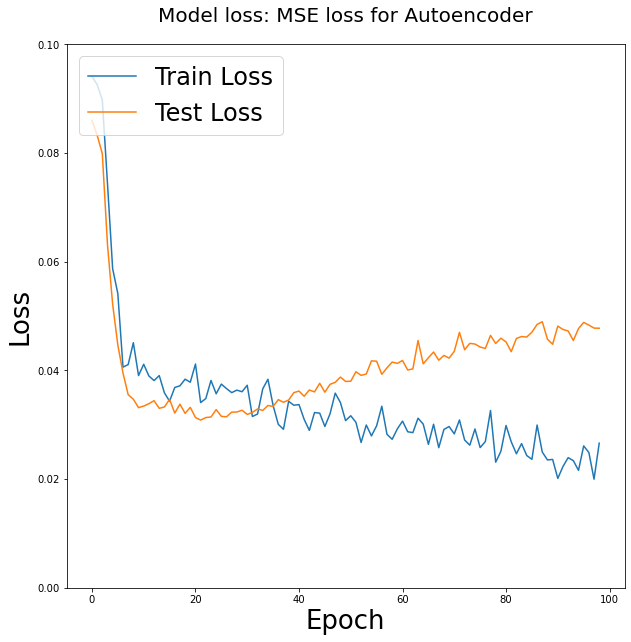

In [34]:
plt.figure(figsize=(10,10))
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('Model loss: MSE loss for Autoencoder',fontsize=20,y=1.03)
plt.ylim(0,0.1)
plt.ylabel('Loss',fontsize=26)
plt.xlabel('Epoch',fontsize=26)
plt.legend(['Train Loss', 'Test Loss'], loc='upper left',fontsize=24)
plt.savefig('Loss_pl ot')

In [35]:
with torch.no_grad():
    for data in test_loader:
        encoded = model.encode(data.x, data.edge_index, data.batch)
        reconstruction = model.decode(encoded)
        break
with torch.no_grad():
    for batch_images in test_images_loader:
        batch_images = batch_images
        break

with torch.no_grad():
    number = 10
    plt.figure(figsize=(10, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(batch_images[index].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [40]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.lin2 = Linear(128, 20)
        self.lin3 = Linear(20, dataset.num_classes)

    def forward(self, x):
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x
    

In [41]:
print("Printing Model:")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = Classifier().to(device)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)
print(classifier)
criterion = torch.nn.CrossEntropyLoss()

Printing Model:
Classifier(
  (lin2): Linear(in_features=128, out_features=20, bias=True)
  (lin3): Linear(in_features=20, out_features=2, bias=True)
)


In [42]:
from tqdm import tqdm
def train():
    classifier.train()

    for data in tqdm(train_loader):
        out = model.encoder(data.x, data.edge_index, data.batch)
        out = classifier(out)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test(loader):
    classifier.eval()
    correct = 0
    for data in loader:
        out = model.encoder(data.x, data.edge_index, data.batch)
        out = classifier(out)
        pred = out.argmax(dim=1)
        correct+= int((pred == data.y).sum())
    return correct/len(loader.dataset)

In [43]:
train_accuray = []
test_accuracy = []
train_loss = []

for epoch in range(1, 50):
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    train_accuray.append(train_acc)
    test_accuracy.append(test_acc)
    train_loss.append(loss)
    print(f'Epoch: {epoch:03d}, Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}, Train loss: {loss}')

 14%|█▍        | 10/71 [00:00<00:00, 97.80it/s]

Epoch: 001, Train acc: 0.8944, Test acc: 0.9100, Train loss: 0.3565738797187805


 14%|█▍        | 10/71 [00:00<00:00, 95.04it/s]

Epoch: 002, Train acc: 0.9078, Test acc: 0.9140, Train loss: 0.27431559562683105


 15%|█▌        | 11/71 [00:00<00:00, 103.73it/s]

Epoch: 003, Train acc: 0.9129, Test acc: 0.9120, Train loss: 0.25044530630111694


 15%|█▌        | 11/71 [00:00<00:00, 103.03it/s]

Epoch: 004, Train acc: 0.9164, Test acc: 0.9060, Train loss: 0.2339208573102951


 15%|█▌        | 11/71 [00:00<00:00, 101.69it/s]

Epoch: 005, Train acc: 0.9178, Test acc: 0.9080, Train loss: 0.22034569084644318


 15%|█▌        | 11/71 [00:00<00:00, 105.84it/s]

Epoch: 006, Train acc: 0.9196, Test acc: 0.9040, Train loss: 0.2091054618358612


 15%|█▌        | 11/71 [00:00<00:00, 106.41it/s]

Epoch: 007, Train acc: 0.9202, Test acc: 0.9060, Train loss: 0.1999334692955017


 15%|█▌        | 11/71 [00:00<00:00, 105.74it/s]

Epoch: 008, Train acc: 0.9220, Test acc: 0.9040, Train loss: 0.1925446093082428


 15%|█▌        | 11/71 [00:00<00:00, 104.02it/s]

Epoch: 009, Train acc: 0.9224, Test acc: 0.9060, Train loss: 0.18664219975471497


 15%|█▌        | 11/71 [00:00<00:00, 104.94it/s]

Epoch: 010, Train acc: 0.9213, Test acc: 0.9060, Train loss: 0.18193796277046204


 15%|█▌        | 11/71 [00:00<00:00, 103.06it/s]

Epoch: 011, Train acc: 0.9220, Test acc: 0.9080, Train loss: 0.17818468809127808


 15%|█▌        | 11/71 [00:00<00:00, 106.05it/s]

Epoch: 012, Train acc: 0.9229, Test acc: 0.9100, Train loss: 0.17517562210559845


 15%|█▌        | 11/71 [00:00<00:00, 102.28it/s]

Epoch: 013, Train acc: 0.9229, Test acc: 0.9100, Train loss: 0.17274869978427887


 15%|█▌        | 11/71 [00:00<00:00, 104.06it/s]

Epoch: 014, Train acc: 0.9227, Test acc: 0.9100, Train loss: 0.17077496647834778


 15%|█▌        | 11/71 [00:00<00:00, 101.70it/s]

Epoch: 015, Train acc: 0.9227, Test acc: 0.9080, Train loss: 0.16915200650691986


 14%|█▍        | 10/71 [00:00<00:00, 94.07it/s]

Epoch: 016, Train acc: 0.9231, Test acc: 0.9080, Train loss: 0.1678052544593811


 15%|█▌        | 11/71 [00:00<00:00, 101.96it/s]

Epoch: 017, Train acc: 0.9238, Test acc: 0.9080, Train loss: 0.16667351126670837


 14%|█▍        | 10/71 [00:00<00:00, 97.31it/s]

Epoch: 018, Train acc: 0.9244, Test acc: 0.9080, Train loss: 0.16571159660816193


 14%|█▍        | 10/71 [00:00<00:00, 93.36it/s]

Epoch: 019, Train acc: 0.9247, Test acc: 0.9080, Train loss: 0.16488531231880188


 13%|█▎        | 9/71 [00:00<00:00, 89.64it/s]

Epoch: 020, Train acc: 0.9244, Test acc: 0.9080, Train loss: 0.16416536271572113


 14%|█▍        | 10/71 [00:00<00:00, 91.50it/s]

Epoch: 021, Train acc: 0.9249, Test acc: 0.9100, Train loss: 0.1635316163301468


 14%|█▍        | 10/71 [00:00<00:00, 93.24it/s]

Epoch: 022, Train acc: 0.9251, Test acc: 0.9100, Train loss: 0.16296735405921936


 14%|█▍        | 10/71 [00:00<00:00, 94.52it/s]

Epoch: 023, Train acc: 0.9249, Test acc: 0.9120, Train loss: 0.16246089339256287


 14%|█▍        | 10/71 [00:00<00:00, 96.48it/s]

Epoch: 024, Train acc: 0.9258, Test acc: 0.9120, Train loss: 0.1620003879070282


 15%|█▌        | 11/71 [00:00<00:00, 104.59it/s]

Epoch: 025, Train acc: 0.9258, Test acc: 0.9140, Train loss: 0.16158008575439453


 15%|█▌        | 11/71 [00:00<00:00, 103.59it/s]

Epoch: 026, Train acc: 0.9258, Test acc: 0.9140, Train loss: 0.16119349002838135


 15%|█▌        | 11/71 [00:00<00:00, 101.71it/s]

Epoch: 027, Train acc: 0.9258, Test acc: 0.9140, Train loss: 0.16083559393882751


 15%|█▌        | 11/71 [00:00<00:00, 103.16it/s]

Epoch: 028, Train acc: 0.9262, Test acc: 0.9140, Train loss: 0.16050074994564056


 15%|█▌        | 11/71 [00:00<00:00, 107.26it/s]

Epoch: 029, Train acc: 0.9262, Test acc: 0.9140, Train loss: 0.16018757224082947


 15%|█▌        | 11/71 [00:00<00:00, 104.05it/s]

Epoch: 030, Train acc: 0.9269, Test acc: 0.9140, Train loss: 0.15989220142364502


 14%|█▍        | 10/71 [00:00<00:00, 99.21it/s]

Epoch: 031, Train acc: 0.9269, Test acc: 0.9140, Train loss: 0.1596127599477768


 15%|█▌        | 11/71 [00:00<00:00, 100.81it/s]

Epoch: 032, Train acc: 0.9269, Test acc: 0.9140, Train loss: 0.15934978425502777


 15%|█▌        | 11/71 [00:00<00:00, 102.22it/s]

Epoch: 033, Train acc: 0.9269, Test acc: 0.9140, Train loss: 0.15909866988658905


 15%|█▌        | 11/71 [00:00<00:00, 105.67it/s]

Epoch: 034, Train acc: 0.9269, Test acc: 0.9160, Train loss: 0.1588590145111084


 15%|█▌        | 11/71 [00:00<00:00, 105.97it/s]

Epoch: 035, Train acc: 0.9269, Test acc: 0.9160, Train loss: 0.15862992405891418


 15%|█▌        | 11/71 [00:00<00:00, 104.96it/s]

Epoch: 036, Train acc: 0.9271, Test acc: 0.9160, Train loss: 0.15841150283813477


 15%|█▌        | 11/71 [00:00<00:00, 106.14it/s]

Epoch: 037, Train acc: 0.9271, Test acc: 0.9180, Train loss: 0.15820138156414032


 15%|█▌        | 11/71 [00:00<00:00, 100.75it/s]

Epoch: 038, Train acc: 0.9267, Test acc: 0.9180, Train loss: 0.1579992026090622


 15%|█▌        | 11/71 [00:00<00:00, 102.60it/s]

Epoch: 039, Train acc: 0.9264, Test acc: 0.9180, Train loss: 0.15780451893806458


 15%|█▌        | 11/71 [00:00<00:00, 102.82it/s]

Epoch: 040, Train acc: 0.9262, Test acc: 0.9200, Train loss: 0.1576165109872818


 15%|█▌        | 11/71 [00:00<00:00, 104.83it/s]

Epoch: 041, Train acc: 0.9260, Test acc: 0.9200, Train loss: 0.15743400156497955


 15%|█▌        | 11/71 [00:00<00:00, 102.27it/s]

Epoch: 042, Train acc: 0.9262, Test acc: 0.9200, Train loss: 0.15725699067115784


 15%|█▌        | 11/71 [00:00<00:00, 103.58it/s]

Epoch: 043, Train acc: 0.9262, Test acc: 0.9180, Train loss: 0.15708544850349426


 15%|█▌        | 11/71 [00:00<00:00, 102.06it/s]

Epoch: 044, Train acc: 0.9262, Test acc: 0.9160, Train loss: 0.15691877901554108


 15%|█▌        | 11/71 [00:00<00:00, 101.13it/s]

Epoch: 045, Train acc: 0.9264, Test acc: 0.9160, Train loss: 0.15675705671310425


 14%|█▍        | 10/71 [00:00<00:00, 99.38it/s]

Epoch: 046, Train acc: 0.9264, Test acc: 0.9180, Train loss: 0.1565992832183838


 15%|█▌        | 11/71 [00:00<00:00, 101.76it/s]

Epoch: 047, Train acc: 0.9264, Test acc: 0.9180, Train loss: 0.15644586086273193


 15%|█▌        | 11/71 [00:00<00:00, 100.83it/s]

Epoch: 048, Train acc: 0.9267, Test acc: 0.9180, Train loss: 0.15629705786705017


100%|██████████| 71/71 [00:00<00:00, 101.44it/s]


Epoch: 049, Train acc: 0.9269, Test acc: 0.9180, Train loss: 0.15615147352218628


In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(train_accuray)
plt.plot(test_accuracy)
plt.plot(train_loss)
plt.title('Model loss: Cross-entropy loss for binary classification',fontsize=20,y=1.03)
plt.ylim(0,1)
plt.ylabel('Loss',fontsize=26)
plt.xlabel('Epoch',fontsize=26)
plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss'], loc='upper left',fontsize=24)
plt.show()

In [46]:
# permutated_dataset = permutated_dataset.shuffle()
# # permu_train_dataset = permutated_dataset[:4500]
# # permu_test_dataset = permutated_dataset[4500:]

# permu_dataset_loader = DataLoader(permutated_dataset, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
print(f'Number of training batches created: {len(train_loader)}')

def test(loader):
    classifier.eval()
    correct = 0
    for data in loader:
        out = model.encoder(data.x, data.edge_index, data.batch)
        out = classifier(out)
        pred = out.argmax(dim=1)
        correct+= int((pred == data.y).sum())
    return correct/len(loader.dataset)


test_acc = test(test_loader)
print(f'Test acc: {test_acc:.4f}')

Number of training batches created: 71
Test acc: 0.9180
